In [13]:
from stable_baselines3 import PPO
import gym
import numpy as np
import matplotlib.pyplot as plt



In [14]:
#enviroment
env = gym.make('CartPole-v1')

In [15]:
model = PPO(
    policy='MlpPolicy',
    env=env,
    verbose=1,
    
)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [16]:
#training
model.learn(
    total_timesteps=100_000,
    
)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.2     |
|    ep_rew_mean     | 20.2     |
| time/              |          |
|    fps             | 7309     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 28.3        |
|    ep_rew_mean          | 28.3        |
| time/                   |             |
|    fps                  | 5296        |
|    iterations           | 2           |
|    time_elapsed         | 0           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010084883 |
|    clip_fraction        | 0.133       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.685      |
|    explained_variance   | 0.000473    |
|    learning_rate        | 0.

In [21]:
# evaluating
def evaluate(model, env, episodes=20):
    returns = []
    for ep in range(1, episodes + 1):
        obs = env.reset()
        done = False
        total_reward = 0.0
        while not done:
            action, _ = model.predict(obs)
            obs, reward, done, _ = env.step(action)
            total_reward += reward
        returns.append(total_reward)
        print(f"Episode {ep}: Return = {total_reward}")
    print(f"Mean Return over {episodes} episodes: {np.mean(returns):.2f}")
    return returns


In [26]:
returns = evaluate(model, env, episodes=20)

Episode 1: Return = 500.0
Episode 2: Return = 500.0
Episode 3: Return = 500.0
Episode 4: Return = 500.0
Episode 5: Return = 500.0
Episode 6: Return = 500.0
Episode 7: Return = 500.0
Episode 8: Return = 500.0
Episode 9: Return = 500.0
Episode 10: Return = 500.0
Episode 11: Return = 500.0
Episode 12: Return = 500.0
Episode 13: Return = 500.0
Episode 14: Return = 500.0
Episode 15: Return = 500.0
Episode 16: Return = 500.0
Episode 17: Return = 500.0
Episode 18: Return = 500.0
Episode 19: Return = 500.0
Episode 20: Return = 500.0
Mean Return over 20 episodes: 500.00


In [23]:
def plot_returns(returns):
    episodes = list(range(1, len(returns) + 1))
    plt.figure()
    plt.plot(episodes, returns, marker='o', linestyle='-')
    plt.xlabel('Episode')
    plt.ylabel('Return')
    plt.title('Evaluation returns')
    plt.grid(True)
    plt.show()


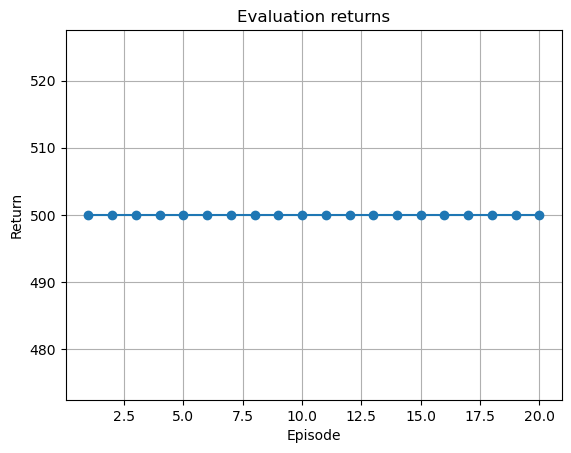

In [25]:
plot_returns(returns)